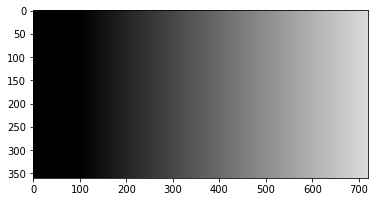

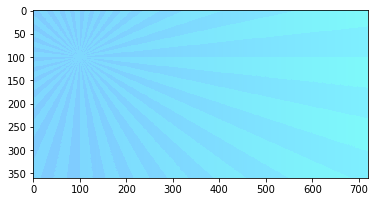

True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
bg = np.ones((360, 720, 3)) * np.array([0.5, 0.8, 1.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# generate strips.
times = 30
rad = 360 / times / 2 
x, y = 100, 100
for i in range(times):
    rotate = i * rad * 2
    img = cv2.ellipse(bg,(x,y),(1500,1500),rotate,0,rad,(0.5,0.85,1.0),-1)
img *= 255
img = img.astype(np.uint8)
# plt.imshow(img[..., ::-1])
# plt.show()

# second color.
color_converted = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# shift color.
color_converted[:, :, 0] += 10
img_1 = cv2.cvtColor(color_converted, cv2.COLOR_HSV2BGR)
# plt.imshow(img_1[...,::-1])
# plt.show()


# make opacity mask.
alpha = np.ones((360, 720, 3))

# H, W = 170, 170
# x, y = 180, 360
# sigma = -1
# gaussian_kernel = cv2.getGaussianKernel(H, 50) * cv2.getGaussianKernel(W, 50).T
# gaussian_kernel /= np.max(gaussian_kernel)
# x0, x1, y0, y1 = int(x-W/2), int(x+W/2), int(y-H/2), int(y + H/2)
# alpha[x0:x1, y0:y1, :] *= 1-  gaussian_kernel[:,:,np.newaxis]

revert = 0
shift = 100
mag = 1.0
for i in range(720):
    alpha[:,i,:] *= np.abs(revert -  max(min(mag * (i - shift)  / 720, 1.), 0.0))
plt.imshow(alpha[..., ::-1])
plt.show()
    
# optional. reverse mask.
# combine.
mask_img = (alpha * img_1 + (1 - alpha)*img).astype(np.uint8)
plt.imshow(mask_img)
plt.show()

cv2.imwrite('test.jpg', mask_img)

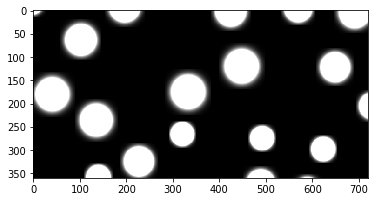

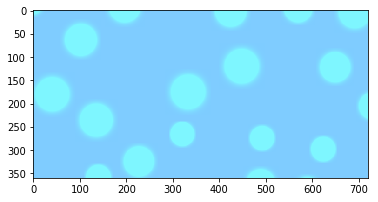

In [169]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
random.seed(10)
# INIT CANVAS = 360(H), 720(W)
H = 360
W = 720
RGB = (np.array([0.5, 0.8, 1.0])*255).astype(np.uint8)
alpha = np.zeros((360, 720))
img = (np.ones((360, 720, 3)) * np.array([0.5, 0.8, 1.0])*255).astype(np.uint8)
color_converted = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# shift color.
color_converted[:, :, 0] += 10
img_1 = cv2.cvtColor(color_converted, cv2.COLOR_HSV2BGR)

def gen_gaussian_kernel(side, r=100, sigma=-1):
    gaussian_kernel = cv2.getGaussianKernel(side, sigma) * cv2.getGaussianKernel(side, sigma).T
    gaussian_kernel = gaussian_kernel * 255 * r
    gaussian_kernel[gaussian_kernel > 1] = 1
    return gaussian_kernel

def gen_random_point(H, W):
    side = random.randint(50, 100)
    x, y = random.randint(side, H - side), random.randint(side, W - side)
    sigma = 0
    r = random.randint(10, 500)
    gaussian_kernel = gen_gaussian_kernel(side, 100, sigma)
    x0, x1, y0, y1 = int(x-side/2) , int(x+side/2), int(y - side/2), int(y + side/2)
#     print( x0, x1, y0, y1)
    return gaussian_kernel, slice(x0,x1), slice(y0,y1)
side = 100
alpha = np.zeros((H + 2 * side, W + 2 * side))

num_kernel = 0
while num_kernel < 20:
    gaussian_kernel, sx, sy = gen_random_point(H + 2*side, W + 2*side)
    if np.all(alpha[sx, sy] == 0):
        alpha[sx, sy] = np.maximum(gaussian_kernel, alpha[sx,sy])
        num_kernel += 1

alpha = alpha[side: side+H,side: side+W][...,np.newaxis]
plt.imshow(np.repeat(alpha, 3, 2))
plt.show()
mask_img = (alpha * img_1 + (1 - alpha)*img).astype(np.uint8)
plt.imshow(mask_img)
plt.show()

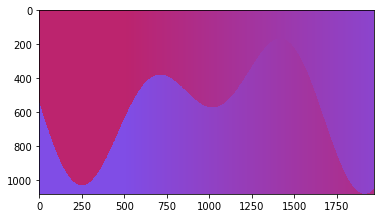

In [362]:
from BGGenTony import BGGenTony
DEBUG = True
H = 1080
W = 1970
RGB2 = np.array([188, 36, 110]).astype(np.uint8)
RGB = np.array([128, 77, 230]).astype(np.uint8)
tonyer = BGGenTony(H, W)
bg = tonyer.sea_bg(RGB, RGB2)
plt.imshow(bg)
plt.show()

In [357]:
def strip_mask(alpha, H, W):
    for i in range(4):
        thickness = 30
        ptStart = (30 + i * thickness * 2, 60)
        ptEnd = (60 + i * thickness * 2, 260)
        point_color = (0.2) # BGR
        lineType = 8
        cv2.line(alpha, ptStart, ptEnd, point_color, thickness, lineType)
    plt.imshow(alpha)
    plt.show()
    cv2.imwrite('strip.jpg', alpha * 255)
    return alpha
def triangle_mask(alpha, H, W):
    for i in range(4):
        thickness = 30
        ptStart = (30 + i * thickness * 2, 60)
        ptEnd = (60 + i * thickness * 2, 260)
        point_color = (0.6) # BGR
        lineType = 8
        cv2.triangulatePoints(alpha, ptStart, ptEnd, point_color, thickness, lineType)
    plt.imshow(alpha)
    plt.show()
    cv2.imwrite('strip.jpg', alpha * 255)
    return alpha

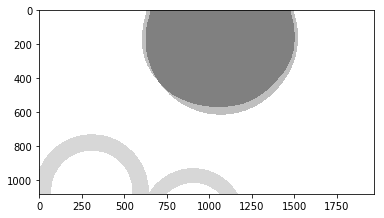

In [381]:
import numpy as np
import cv2
import random
# random.seed(10)
from albumentations import Compose, GridDistortion
aug = GridDistortion(p=1)
H = 1080
W = 1970



# random.seed(1024)
alpha = (np.ones((H, W, 3)) * 255).astype(np.uint8)
for _ in range(3):
#     R = random.randint(0, H/6)
    R = 500
    center = (random.randint(int(0 + R), int(W - R)), random.randint(0, H/6))
    cv2.circle(alpha, center, random.randint(int(R/3*2), R), (0,0,0), -1)
# kernol = np.array([[1, 1, 1],[1, 1, 1],[1,1,1]], np.float32)
# cv2.filter2D(alpha, -1, kernol);
alpha = cv2.GaussianBlur(alpha, (151, 151), 0)
alpha1 = aug(image=alpha)['image']
alpha[alpha < 220] = 64
alpha[alpha >= 220] = 128
alpha1[alpha1 < 220] = 64
alpha1[alpha1 >= 220] = 127

alpha = alpha1 + alpha

for i in range(3):
    center = (random.randint(int(-W/4 * 3), int(W / 5 * 3)), random.randint(int(H/6 * 5), int(H / 5 * 6)))
    r = random.randint(200, 300)
    cv2.circle(alpha, center, r, (215,215,215), int(r/3))
#     cv2.circle(alpha, center, int(r*0.8), (255,255,255), -1)



# cv2.putText(img, "(0,0)", (0, 0 + 1*30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
plt.imshow(alpha)
cv2.imwrite('test.png',alpha)
plt.show()


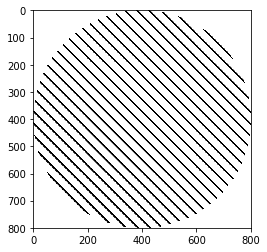

(100, 100)
0 500 0 500
(500, 500, 3)


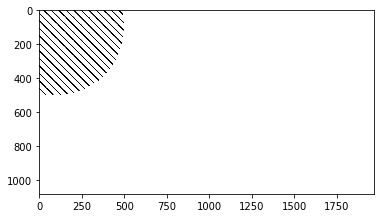

In [373]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
H, W = 1080, 1970
# random.seed(10)
def gen_circle(outR = 200, angle = -45, w = 2):
    eleR = outR
    num = 30
    step = int(eleR / num)
    halfR = int(eleR / 2)
    # random.seed(1024)
    circle = (np.ones((eleR, eleR, 3)) * 255).astype(np.uint8)
    cv2.circle(circle, (halfR, halfR), halfR, (0,0,0), -1)
    strip = (np.ones((eleR, eleR, 3)) * 255).astype(np.uint8)
    for i in range(int(eleR/step)):
        cv2.line(strip, (0 + i * step, 0), (0 + i * step, eleR), (0,0,0), w)
    rotateMatrix = cv2.getRotationMatrix2D(center=(strip.shape[1]/2, strip.shape[0]/2), angle = angle, scale = 1.2)
    rot_strip = cv2.warpAffine(strip, rotateMatrix, (strip.shape[1], strip.shape[0]))
    
    rot_strip[circle != 0] = 255
    circle[strip != 0] = 255

    cv2.imwrite('rot_circle.png', rot_strip)
    plt.imshow(rot_strip)
    plt.show()
    return rot_strip


cir = gen_circle(outR=800, angle=45, w=3)
eleH, eleW = cir.shape[:2]
canvas = (np.ones((H, W, 3)) * 255).astype(np.uint8)
for i in range(1):
    center = (random.randint(0, int(W)),
              random.randint(H*i - i*int(H/100),
                             (i==1)*(H -int(H/100)) + (i==0)*int(H/4)))
    center = (100,100)
    # gen slice of origin pic.
    x1 = int(max(0, center[0] - eleW/2))
    x2 = int(min(W, center[0] + eleW/2))
    y1 = int(max(0, center[1] - eleH/2))
    y2 = int(min(H, center[1] + eleH/2))
    print(center)
    print(x1,x2,y1,y2)
    cir_slice = cir[
        int(y1 + eleH/2-center[1]):int(y2 + eleH/2 - center[1]),
        int(x1 + eleW/2-center[0]):int(x2 + eleW/2 - center[0])]
    print(cir_slice.shape)
    #     plt.imshow(cir_slice)
    #     plt.show()
    canvas[y1:y2, x1:x2] = cir_slice
plt.imshow(canvas)
plt.show()

1200 1200
(1450, 800)
850 1970 200 1080
(880, 1120)


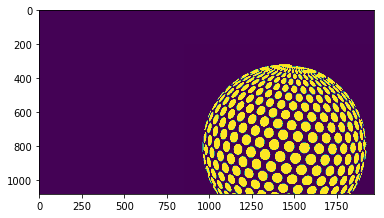

In [374]:
element = cv2.imread('./dec/pointball{}.png'.format(random.randint(0,5)), -1)
watermark = np.ones((H, W))
mask = element[:,:,3]
mask = cv2.GaussianBlur(mask, (5, 5), 0)
# ruihua
mask[mask > 128] = 255
mask[mask <= 128] = 0

mask = cv2.resize(mask, (1200, 1200), cv2.INTER_CUBIC)

eleH, eleW = mask.shape[:2]
print(eleH, eleW)
center = (random.randint(0, int(W)),
          random.randint(H*i - i*int(H/100), (i==1)*(H -int(H/100)) + (i==0)*int(H/4)))
center = (1450,800)
# gen slice of origin pic.
x1 = int(max(0, center[0] - int(eleW/2)))
x2 = int(min(W, center[0] + int(eleW/2)))
y1 = int(max(0, center[1] - int(eleH/2)))
y2 = int(min(H, center[1] + int(eleH/2)))
print(center)
print(x1,x2,y1,y2)
cir_slice = mask[
    int(y1 + int(eleH/2)-center[1]):int(y2 + int(eleH/2) - center[1]),
    int(x1 + int(eleW/2)-center[0]):int(x2 + int(eleW/2) - center[0])]
print(cir_slice.shape)
#     plt.imshow(cir_slice)
#     plt.show()
watermark[y1:y2, x1:x2] = cir_slice
plt.imshow(watermark)
plt.show()

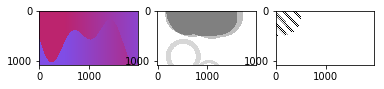

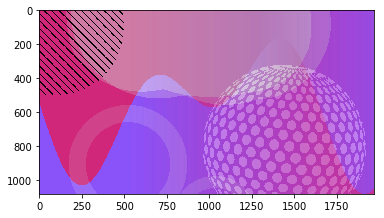

In [375]:
plt.subplot(131).imshow(bg)
plt.subplot(132).imshow(alpha)
plt.subplot(133).imshow(canvas)
plt.show()

coverted = cv2.cvtColor(bg, cv2.COLOR_BGR2HSV).astype(np.float64)
coverted[:,:,2] += 20
coverted[:,:,1] *= alpha[:,:,0] / 255.0
coverted = coverted.astype(np.uint8)
bg1 = cv2.cvtColor(coverted, cv2.COLOR_HSV2BGR).astype(np.uint8)
bg1[canvas == 0] = 0

coverted = cv2.cvtColor(bg1, cv2.COLOR_BGR2HSV).astype(np.float64)
coverted[watermark == 255,1] -= 50
coverted[watermark == 255,2] += 20
coverted = coverted.astype(np.uint8)
bg1 = cv2.cvtColor(coverted, cv2.COLOR_HSV2BGR).astype(np.uint8)

plt.imshow(bg1)
cv2.imwrite('final_combined.png', bg1)
plt.show()
